In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from keras.models import load_model

In [2]:
#definind the start and end time

start = '2010-01-01'
end = '2022-03-31'
df = data.DataReader('AAPL','yahoo',start,end) #stock ticker entered
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444381
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439792


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-25,175.279999,172.750000,173.880005,174.720001,80546200.0,174.720001
2022-03-28,175.729996,172.000000,172.169998,175.600006,90371900.0,175.600006
2022-03-29,179.009995,176.339996,176.690002,178.960007,100589400.0,178.960007
2022-03-30,179.610001,176.699997,178.550003,177.770004,92633200.0,177.770004
2022-03-31,178.029999,174.399994,177.839996,174.610001,103049300.0,174.610001


In [4]:
#reseting the index

df = df.reset_index()
df.head()   #we don't want the date so we can just remove them

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444381
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439792


In [5]:
#no need of date column and adj. close column so just drop them
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


In [6]:
#our based on close column we can amke an app for open 
#low high volmune uo to us

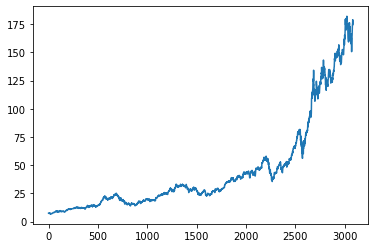

In [7]:
#workin on the close column
plt.plot(df.Close)     #graph showing the closing price of AAPL stack

In [8]:
#how can we create the moving avergaes

#suppos we want 100 days moving avergae
# then for the 100 days moving average it will calculate the mean of 100 days 
# moving avergae for the 101th index

In [9]:
#for thet we need to create a rollijg function

ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3079    166.277701
3080    166.533501
3081    166.808201
3082    167.076301
3083    167.309601
Name: Close, Length: 3084, dtype: float64

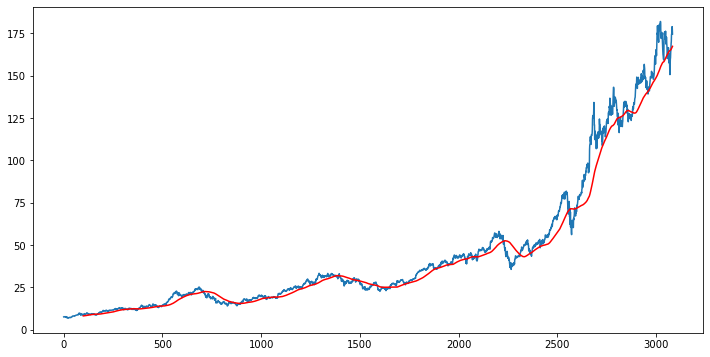

In [10]:
#plot moving average in the function
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

#below graph with 100 days rolling average

In [11]:
#for 200 days moving avegare
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3079    155.55140
3080    155.79265
3081    156.03505
3082    156.27570
3083    156.49800
Name: Close, Length: 3084, dtype: float64

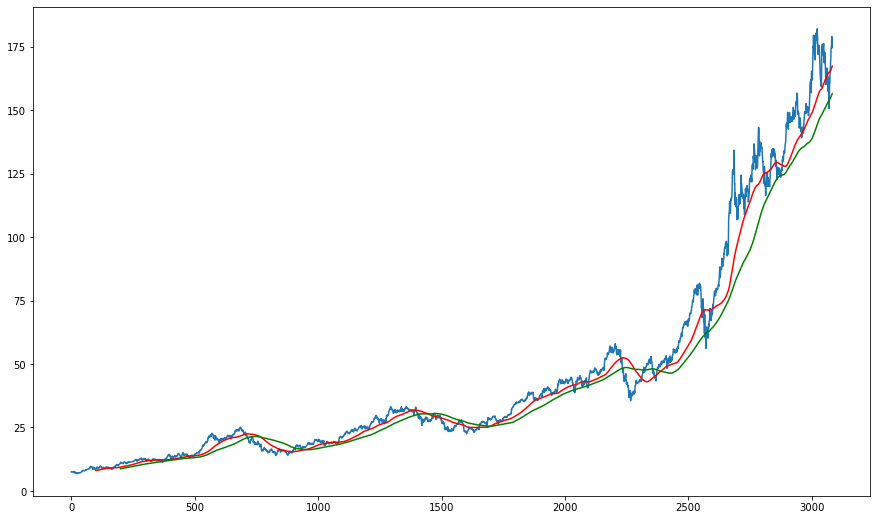

In [13]:
#plot moving average in the function
plt.figure(figsize = (15,9))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

#below graph with 200 days rolling average

In [14]:
df.shape #how many rows and colums that we have

(3084, 5)

In [31]:
#splitting data into trainning and testing

In [23]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])  
#we will use 70% of total data-set as training


#for datatesting

data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
#rest 30% data will be test_data

print("Trainning Data-Shape: ",data_training.shape)
print("Testing Data-Shape: ",data_testing.shape)

Trainning Data-Shape:  (2158, 1)
Testing Data-Shape:  (926, 1)


In [24]:
#data trainning obersevation

data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [25]:
#data testing obersevation
data_testing.head()

,Close
2158,47.477501
2159,47.572498
2160,50.375000
2161,51.847500
2162,51.997501


In [26]:
#now we need to scale our data

#for stat LSTM we need to scale down oue data betwn 0-1 for taht we need 
#to import min-max scalar form sklearn data pre-processing

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

scaler

MinMaxScaler()

In [28]:
#now we can fit our data in minmax scalar

#fititng the training data in minmax scaler

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01594276],
       [0.01874214],
       [0.01905793],
       ...,
       [1.        ],
       [0.99635569],
       [0.97705871]])

In [45]:
#divide uthe data in xtrain and ytrain

In [29]:
x_train = []
y_train = []

data_training_array.shape

(2158, 1)

In [30]:
#insert values in xtrain and ytrain

for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
    
    
x_train

[array([[1.59427605e-02],
        [1.87421428e-02],
        [1.90579332e-02],
        [1.61476089e-02],
        [1.58147374e-02],
        [1.70095972e-02],
        [1.54136324e-02],
        [1.33738199e-02],
        [1.58744815e-02],
        [1.48332608e-02],
        [1.18461227e-02],
        [1.96212122e-02],
        [1.67962481e-02],
        [1.36725291e-02],
        [4.86475384e-03],
        [9.40520519e-03],
        [1.18546576e-02],
        [1.35103893e-02],
        [6.17909052e-03],
        [8.52348074e-06],
        [2.28727833e-03],
        [3.25169651e-03],
        [6.12788127e-03],
        [0.00000000e+00],
        [2.91030148e-03],
        [1.76666231e-03],
        [3.53334741e-03],
        [2.62012709e-03],
        [5.64993962e-03],
        [7.10938059e-03],
        [9.68685609e-03],
        [8.96141444e-03],
        [9.28571693e-03],
        [8.21034537e-03],
        [7.14350869e-03],
        [4.27585881e-03],
        [7.34835711e-03],
        [8.49199627e-03],
        [1.0

In [31]:
y_train

[0.0444315262813495,
 0.05231756916710609,
 0.055330323336760384,
 0.058701519498459226,
 0.06136435515680555,
 0.06065597186339752,
 0.05454513755650153,
 0.050260721083051796,
 0.048886640270084936,
 0.04365486398182719,
 0.049893732820215225,
 0.0524541499693901,
 0.05311130121815694,
 0.057728566451386104,
 0.06418079578885355,
 0.06812381723173183,
 0.0700014215297084,
 0.06667291114185869,
 0.06981367705294955,
 0.0673556784129461,
 0.0656743648625204,
 0.0637113662267901,
 0.0650769235590204,
 0.054724358552523805,
 0.05076426735811693,
 0.048161187225148366,
 0.046846861937559214,
 0.04828922175664038,
 0.05685800912342895,
 0.05636300911915579,
 0.05766883371606382,
 0.055680241848068385,
 0.05099469760872494,
 0.05178840686972036,
 0.05069598835200265,
 0.049373116793621497,
 0.04568611883361634,
 0.05107150009557579,
 0.053077161715099797,
 0.057156741170206665,
 0.05794192695046552,
 0.057378647940078104,
 0.06147529714671354,
 0.058812461488367246,
 0.05638007887068436,
 0

In [32]:
#convert xtrain in numpy array so that we can provide our data to LSTM

x_train , y_train = np.array(x_train), np.array(y_train)

In [51]:
x_train

array([[[0.01594276],
        [0.01874214],
        [0.01905793],
        ...,
        [0.04290384],
        [0.04669321],
        [0.04537889]],

       [[0.01874214],
        [0.01905793],
        [0.01614761],
        ...,
        [0.04669321],
        [0.04537889],
        [0.04443153]],

       [[0.01905793],
        [0.01614761],
        [0.01581474],
        ...,
        [0.04537889],
        [0.04443153],
        [0.05231757]],

       ...,

       [[0.88881871],
        [0.89246303],
        [0.89156683],
        ...,
        [0.97980692],
        [0.98082253],
        [0.98912677]],

       [[0.89246303],
        [0.89156683],
        [0.88176902],
        ...,
        [0.98082253],
        [0.98912677],
        [1.        ]],

       [[0.89156683],
        [0.88176902],
        [0.89317991],
        ...,
        [0.98912677],
        [1.        ],
        [0.99635569]]])

In [33]:
y_train

array([0.04443153, 0.05231757, 0.05533032, ..., 1.        , 0.99635569,
       0.97705871])

In [34]:
x_train.shape

(2058, 100, 1)

In [53]:
#creating the ML model

In [35]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [55]:
#creating the sequeential model

In [36]:
model = Sequential()

model.add(LSTM(units = 50,activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))

#add dropout
model.add(Dropout(0.2))

#2nd layer
model.add(LSTM(units = 60,activation = 'relu', return_sequences = True))

#add dropout
model.add(Dropout(0.3))

#3rd layer
model.add(LSTM(units = 80,activation = 'relu', return_sequences = True))

#add dropout
model.add(Dropout(0.4))

#for 4th layer
model.add(LSTM(units = 120,activation = 'relu'))

#add dropout
model.add(Dropout(0.5))

#for the last layer we have dense layer that connects all the layer
model.add(Dense(units = 1))  #only one units as we need to predict only one value i.e. closing price

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [59]:
#now can simply compile our model for compilation we will use adam optimiser
model.compile(optimizer = 'adam', loss = 'mean_squared_error') #other losses are like binary-cross-entropy and ctegorical corss entropy used for claasification
#for time series prediction we can use mean_squared_error
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
65/65 [==============================] - 30s 244ms/step - loss: 0.0378
Epoch 2/50
65/65 [==============================] - 16s 246ms/step - loss: 0.0075
Epoch 3/50
65/65 [==============================] - 15s 223ms/step - loss: 0.0067
Epoch 4/50
65/65 [==============================] - 17s 266ms/step - loss: 0.0061
Epoch 5/50
65/65 [==============================] - 17s 256ms/step - loss: 0.0052
Epoch 6/50
65/65 [==============================] - 18s 275ms/step - loss: 0.0065
Epoch 7/50
65/65 [==============================] - 17s 261ms/step - loss: 0.0051
Epoch 8/50
65/65 [==============================] - 16s 247ms/step - loss: 0.0052
Epoch 9/50
65/65 [==============================] - 15s 225ms/step - loss: 0.0048
Epoch 10/50
65/65 [==============================] - 15s 230ms/step - loss: 0.0044
Epoch 11/50
65/65 [==============================] - 16s 250ms/step - loss: 0.0043
Epoch 12/50
65/65 [==============================] - 15s 225ms/step - loss: 0.0043
Epoch 13/50
6

In [60]:
#now saving the model for prediction

In [61]:
model.save('stock_close_predictor.h5')

In [63]:
#now we will use testing data for predicion purpose 30% data is tetsing data

In [38]:
data_testing.head()

,Close
2158,47.477501
2159,47.572498
2160,50.375000
2161,51.847500
2162,51.997501


In [39]:
#for predicting the values of testing data--> 2158th day 
# we need the mean of previous 100 days

data_training.tail(100) #100 previous data from 2158 index position

,Close
2058,43.757500
2059,44.235001
2060,44.994999
2061,45.430000
2062,44.992500
...,...
2153,47.902500
2154,48.250000
2155,48.705002
2156,48.552502


In [40]:
past_100_days = data_training.tail(100)

In [41]:
final_df = past_100_days.append(data_testing,ignore_index = True) 
#last 100 days of data_testing and data_trainning are appended in final_df

In [42]:
final_df.head()  #this is the testing data

,Close
0,43.757500
1,44.235001
2,44.994999
3,45.430000
4,44.992500


In [43]:
# new again we need to scale the testing data, we need to apply MInMax
# Scaler because this data is not sacled down to 0-1

In [44]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0560553 ],
       [0.05931553],
       [0.06450456],
       ...,
       [0.97917564],
       [0.97105068],
       [0.94947516]])

In [45]:
input_data.shape  #1 means for 1 coulumn i.e. closing price column

(1026, 1)

In [46]:
x_test = []
y_test = []

#gaain define the step size as 100
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])  #oth coulmn i.e. closing price column

In [47]:
x_test, y_test = np.array(x_test),np.array(y_test)

In [48]:
x_test.shape

(926, 100, 1)

In [49]:
y_test.shape

(926,)

In [51]:
#making predictions
model = load_model('stock_close_predictor.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [52]:
y_predicted = model.predict(x_test)

In [53]:
y_predicted.shape

(926, 1)

In [54]:
y_test

array([0.0814543 , 0.08210292, 0.10123752, 0.11129129, 0.11231545,
       0.11415893, 0.11081335, 0.11105232, 0.11383461, 0.11153025,
       0.11381752, 0.11531962, 0.11615602, 0.12141334, 0.12868482,
       0.12506616, 0.12434923, 0.12436631, 0.12511736, 0.126261  ,
       0.12929931, 0.13230349, 0.13790219, 0.14140138, 0.14583939,
       0.14708543, 0.14454211, 0.13810704, 0.13503457, 0.12996501,
       0.13938723, 0.13464199, 0.14375694, 0.13937014, 0.1291969 ,
       0.1298114 , 0.13003328, 0.13286677, 0.12882138, 0.13416403,
       0.13655373, 0.13353247, 0.14126483, 0.14261331, 0.14520781,
       0.1486558 , 0.15341813, 0.14645388, 0.14013825, 0.13925067,
       0.14454211, 0.12660237, 0.12334215, 0.13641717, 0.1283093 ,
       0.13648544, 0.13484681, 0.12602203, 0.13163779, 0.13392506,
       0.13747546, 0.12443458, 0.13247419, 0.12649996, 0.11956987,
       0.1213792 , 0.13086968, 0.13660494, 0.1114449 , 0.10139113,
       0.10511224, 0.115661  , 0.11316891, 0.10630708, 0.08872

In [55]:
y_predicted

array([[0.1457369 ],
       [0.14619964],
       [0.14661813],
       [0.14699614],
       [0.14738011],
       [0.14783585],
       [0.14842898],
       [0.14920884],
       [0.15019768],
       [0.15139753],
       [0.1527904 ],
       [0.15434147],
       [0.1560098 ],
       [0.15775149],
       [0.1595304 ],
       [0.16133058],
       [0.16314411],
       [0.16495952],
       [0.16676237],
       [0.16853678],
       [0.1702677 ],
       [0.17194656],
       [0.1735746 ],
       [0.17516676],
       [0.17674786],
       [0.17834258],
       [0.17997347],
       [0.18165815],
       [0.18339044],
       [0.18513982],
       [0.18685563],
       [0.18848339],
       [0.1899741 ],
       [0.19128901],
       [0.19241825],
       [0.19334698],
       [0.19406268],
       [0.1945615 ],
       [0.1948556 ],
       [0.19496055],
       [0.19490889],
       [0.1947478 ],
       [0.19452064],
       [0.1942825 ],
       [0.19408971],
       [0.19399402],
       [0.19404122],
       [0.194

In [56]:
#now for comparing y+predicted and y_test we need to again scale them up 
#for that we need to find the scaling facot by which we need to scale them up

In [57]:
scaler.scale_  #this is the scaleing factor, now we need to divide y_predicted and 
#y_test data by this factor..

array([0.00682769])

In [58]:

scale_factor = 1/0.00682769

y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [60]:
y_predicted

array([[ 21.344978],
       [ 21.412754],
       [ 21.474045],
       [ 21.52941 ],
       [ 21.585648],
       [ 21.652395],
       [ 21.739267],
       [ 21.853489],
       [ 21.998316],
       [ 22.174047],
       [ 22.378052],
       [ 22.605225],
       [ 22.849571],
       [ 23.104664],
       [ 23.365208],
       [ 23.628866],
       [ 23.894482],
       [ 24.16037 ],
       [ 24.42442 ],
       [ 24.684305],
       [ 24.937819],
       [ 25.183708],
       [ 25.422155],
       [ 25.655346],
       [ 25.886919],
       [ 26.120485],
       [ 26.35935 ],
       [ 26.606092],
       [ 26.859806],
       [ 27.116026],
       [ 27.367327],
       [ 27.605732],
       [ 27.824066],
       [ 28.016651],
       [ 28.182041],
       [ 28.318066],
       [ 28.42289 ],
       [ 28.495947],
       [ 28.539022],
       [ 28.554394],
       [ 28.546827],
       [ 28.523235],
       [ 28.489964],
       [ 28.455086],
       [ 28.426847],
       [ 28.412832],
       [ 28.419746],
       [ 28.4

In [61]:
y_test

array([ 11.92999428,  12.02499164,  14.8274919 ,  16.29999101,
        16.44999246,  16.71999278,  16.22999135,  16.26499118,
        16.67249219,  16.33499084,  16.66998975,  16.88999086,
        17.01249217,  17.78249224,  18.84749033,  18.31749182,
        18.21248851,  18.21499095,  18.32499151,  18.49249097,
        18.93749044,  19.37748884,  20.19748812,  20.70998863,
        21.35998982,  21.54248866,  21.16998748,  20.2274907 ,
        19.77749017,  19.03499024,  20.41499061,  19.71999126,
        21.05498967,  20.41248817,  18.92249106,  19.01249116,
        19.04498855,  19.45998926,  18.86749078,  19.64998779,
        19.9999899 ,  19.55748906,  20.68998818,  20.88749022,
        21.26748728,  21.77248809,  22.46998987,  21.44998993,
        20.52498735,  20.39499016,  21.16998748,  18.54249018,
        18.0649895 ,  19.97998945,  18.79249005,  19.98998777,
        19.74999003,  18.45749114,  19.27998904,  19.61498796,
        20.13498815,  18.22498927,  19.40249036,  18.52

In [62]:
#now plotting them to get the analysis

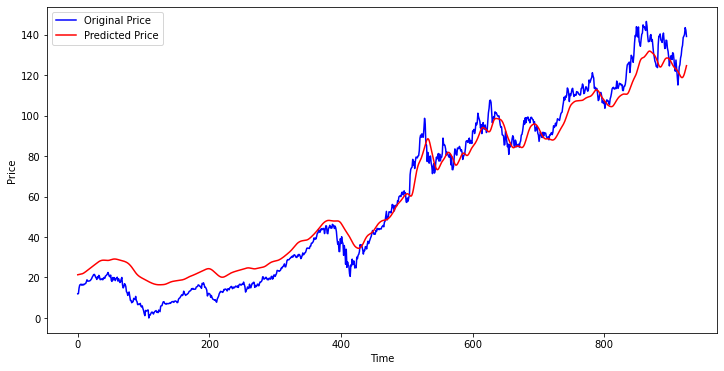

In [63]:
plt.figure(figsize= (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [65]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)


In [66]:
print(train_predict)

[[0.12806302]
 [0.12773845]
 [0.12738892]
 ...
 [0.906693  ]
 [0.90805095]
 [0.9095085 ]]


In [67]:
print(test_predict)

[[0.1457369 ]
 [0.14619964]
 [0.14661813]
 [0.14699614]
 [0.14738011]
 [0.14783585]
 [0.14842898]
 [0.14920884]
 [0.15019768]
 [0.15139753]
 [0.1527904 ]
 [0.15434147]
 [0.1560098 ]
 [0.15775149]
 [0.1595304 ]
 [0.16133058]
 [0.16314411]
 [0.16495952]
 [0.16676237]
 [0.16853678]
 [0.1702677 ]
 [0.17194656]
 [0.1735746 ]
 [0.17516676]
 [0.17674786]
 [0.17834258]
 [0.17997347]
 [0.18165815]
 [0.18339044]
 [0.18513982]
 [0.18685563]
 [0.18848339]
 [0.1899741 ]
 [0.19128901]
 [0.19241825]
 [0.19334698]
 [0.19406268]
 [0.1945615 ]
 [0.1948556 ]
 [0.19496055]
 [0.19490889]
 [0.1947478 ]
 [0.19452064]
 [0.1942825 ]
 [0.19408971]
 [0.19399402]
 [0.19404122]
 [0.19427256]
 [0.19469531]
 [0.19528088]
 [0.19597414]
 [0.19672394]
 [0.19745189]
 [0.19807404]
 [0.19854209]
 [0.19881946]
 [0.19890228]
 [0.198806  ]
 [0.19854036]
 [0.19812918]
 [0.19761074]
 [0.19703737]
 [0.19643322]
 [0.19582513]
 [0.19522536]
 [0.19462135]
 [0.19399677]
 [0.19336393]
 [0.19276161]
 [0.19217327]
 [0.19153851]
 [0.19

In [106]:
#Tenssform them back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [70]:
print(train_predict)

[[ 7989.0366]
 [ 7982.074 ]
 [ 7974.576 ]
 ...
 [24691.63  ]
 [24720.762 ]
 [24752.03  ]]


In [72]:
print(test_predict)

[[ 8368.163 ]
 [ 8378.09  ]
 [ 8387.066 ]
 [ 8395.176 ]
 [ 8403.412 ]
 [ 8413.188 ]
 [ 8425.912 ]
 [ 8442.642 ]
 [ 8463.854 ]
 [ 8489.591 ]
 [ 8519.47  ]
 [ 8552.742 ]
 [ 8588.53  ]
 [ 8625.892 ]
 [ 8664.051 ]
 [ 8702.668 ]
 [ 8741.57  ]
 [ 8780.513 ]
 [ 8819.186 ]
 [ 8857.25  ]
 [ 8894.38  ]
 [ 8930.394 ]
 [ 8965.317 ]
 [ 8999.471 ]
 [ 9033.388 ]
 [ 9067.597 ]
 [ 9102.58  ]
 [ 9138.72  ]
 [ 9175.879 ]
 [ 9213.405 ]
 [ 9250.212 ]
 [ 9285.13  ]
 [ 9317.107 ]
 [ 9345.313 ]
 [ 9369.537 ]
 [ 9389.46  ]
 [ 9404.8125]
 [ 9415.512 ]
 [ 9421.822 ]
 [ 9424.072 ]
 [ 9422.965 ]
 [ 9419.509 ]
 [ 9414.636 ]
 [ 9409.528 ]
 [ 9405.393 ]
 [ 9403.34  ]
 [ 9404.353 ]
 [ 9409.314 ]
 [ 9418.383 ]
 [ 9430.944 ]
 [ 9445.815 ]
 [ 9461.899 ]
 [ 9477.516 ]
 [ 9490.861 ]
 [ 9500.901 ]
 [ 9506.851 ]
 [ 9508.628 ]
 [ 9506.5625]
 [ 9500.865 ]
 [ 9492.044 ]
 [ 9480.922 ]
 [ 9468.623 ]
 [ 9455.663 ]
 [ 9442.619 ]
 [ 9429.753 ]
 [ 9416.797 ]
 [ 9403.399 ]
 [ 9389.823 ]
 [ 9376.902 ]
 [ 9364.282 ]
 [ 9350.666 ]
 [ 933

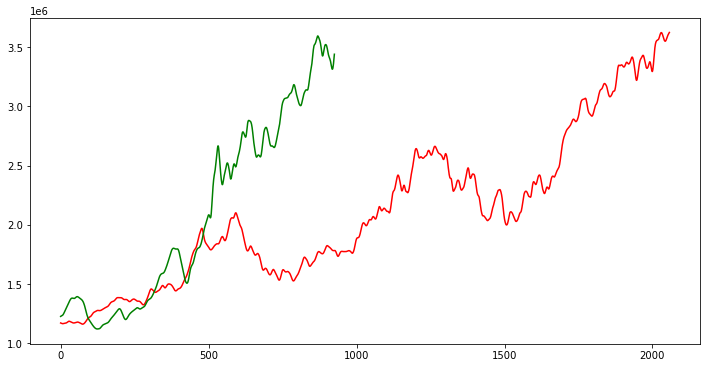

In [109]:
#plot beetween train_predict and test_predict
plt.figure(figsize = (12,6))
plt.plot(train_predict, 'r',label = 'train-predict')
plt.plot(test_predict, 'g',label = 'test-predict')

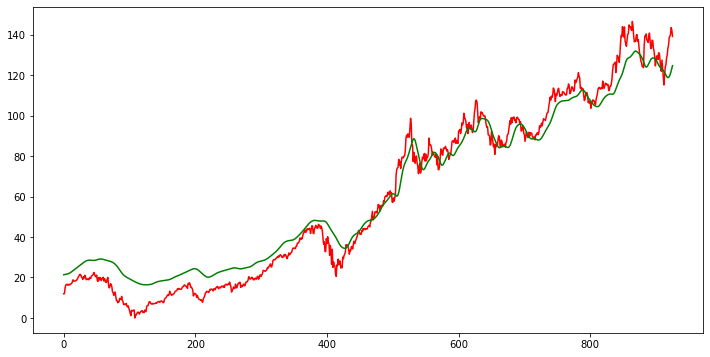

In [114]:
#plot beetween train_predict and test_predict
plt.figure(figsize = (12,6))
plt.plot(y_test, 'r',label = 'train-predict')
plt.plot(y_predicted,'g',label = 'y-predict')

In [76]:
#calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict)) #it is the RMSE for training dataset

15037.231978417845

In [77]:
math.sqrt(mean_squared_error(y_test,test_predict)) #it is the RMSE for training dataset

15224.555341035264

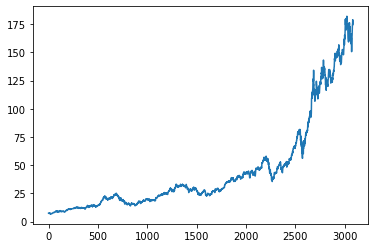

In [97]:
import numpy
look_back = 100
df1 = df.reset_index()['Close']
# df1 = df['Close']
trainPredictPlot = numpy.empty_like(df1)
plt.plot(df1)

In [131]:
# test_predict
#getting the original price values for testing data
predicted_Price = model.predict(x_test)
predicted_Price = scaler.inverse_transform(predicted_Price)
orig=y_test
orig=scaler.inverse_transform(orig)
# Accuracy of the predictions
print('Accuracy:', 100 - (100*(abs(predicted_Price[0]-orig)/orig)).mean())

ValueError: Expected 2D array, got 1D array instead:
array=[ 11.92999428  12.02499164  14.8274919   16.29999101  16.44999246
  16.71999278  16.22999135  16.26499118  16.67249219  16.33499084
  16.66998975  16.88999086  17.01249217  17.78249224  18.84749033
  18.31749182  18.21248851  18.21499095  18.32499151  18.49249097
  18.93749044  19.37748884  20.19748812  20.70998863  21.35998982
  21.54248866  21.16998748  20.2274907   19.77749017  19.03499024
  20.41499061  19.71999126  21.05498967  20.41248817  18.92249106
  19.01249116  19.04498855  19.45998926  18.86749078  19.64998779
  19.9999899   19.55748906  20.68998818  20.88749022  21.26748728
  21.77248809  22.46998987  21.44998993  20.52498735  20.39499016
  21.16998748  18.54249018  18.0649895   19.97998945  18.79249005
  19.98998777  19.74999003  18.45749114  19.27998904  19.61498796
  20.13498815  18.22498927  19.40249036  18.5274908   17.51249192
  17.77749118  19.16748986  20.00748959  16.32249008  14.84999098
  15.39499268  16.93999007  16.57499239  15.56999183  12.99499237
  12.509992    11.15249452  12.30499409  12.8349926   10.91749403
   8.69749393   8.64749472   7.52499391   8.10749408   8.01249672
   9.68749511   9.33999544   9.09749525  10.65749584   8.62499564
   8.13249559   6.57499744   6.85249746   6.60999727   6.72749752
   7.189995     5.82249538   5.43749725   5.96999821   4.67499688
   3.659998     2.13499724   1.15999926   3.74499704   3.4899961
   3.50999655   3.8874988    3.93249695   0.           1.51749725
   1.43499683   2.13999831   2.77999738   2.90249869   2.52499644
   1.9524984    2.71999985   3.18749839   3.41749782   3.65749937
   2.77749875   2.93249745   2.6274973    3.89249605   3.52749837
   3.12249598   5.76499648   6.06249694   6.08249739   7.26499572
   7.99749352   8.01249672   7.18749637   7.05499674   6.80999412
   7.17499561   6.99749403   7.15249654   7.05749537   7.18499393
   7.45999532   7.21749513   7.69499581   8.00999428   8.03499579
   8.16999404   7.73999396   8.19499556   8.41499667   8.33499488
   8.08249638   7.57749556   7.67999643   9.17749323   9.67999542
   9.87999608  10.38499308  10.98249262  11.45749467  11.08499349
  11.4924945   13.2249918   12.21499398  11.63749489  11.14999208
  11.56999385  11.63249382  11.9399926   12.26249457  12.95749391
  13.2899942   13.37499325  13.70249247  14.47749361  14.32749215
  14.60749079  14.18999146  14.16999101  14.25999112  14.26499219
  15.23499292  15.41749176  15.58499121  16.32249008  16.2424921
  15.77249112  15.52749231  15.60499166  14.61999155  17.08249183
  16.73998941  17.38999061  16.57248995  15.16749188  15.1774902
  14.63249231  13.74749062  10.8824942   11.61749444  12.18249278
  11.9724938   11.70249348  10.22499331  11.10249531  10.14749396
   9.36749558   9.19499505   9.00999377   8.79749617   9.02749559
   8.21999707   7.77749623   9.36249451  10.08749262  10.75749426
  11.98999181  12.59749349  13.15499214  12.99999344  12.9899913
  12.63749438  12.92499271  14.06499152  13.91999114  14.31749384
  14.14749194  14.09749273  13.34499448  14.40249288  14.3874935
  13.9324919   14.83999266  15.13499068  15.55499245  15.50999049
  14.45749316  14.76249331  15.25999062  14.88999187  15.27749244
  15.75499311  15.57749152  15.28999319  15.86749229  15.09999085
  16.25749149  16.66249006  16.61999054  16.20749227  16.38749249
  16.87248904  16.64749068  17.71248877  16.5599892   15.45749265
  12.78749202  13.70249247  14.21249053  15.30998983  14.69999334
  14.57249096  16.69499126  15.13999174  14.88749325  16.07749127
  17.03999231  17.04249094  17.61249034  17.5674922   15.11249161
  16.07499265  15.49249248  15.83499109  16.70498958  16.63749236
  15.87749061  16.74999154  17.77249011  17.76748904  17.99498985
  18.62748922  20.3499882   20.22498826  19.13998972  19.42748805
  19.62748872  20.14499029  19.69249112  18.88498879  19.13249003
  18.87248803  19.70998913  19.42498943  19.15749155  20.44498937
  20.59998807  19.19249138  19.65749129  21.20498731  21.21748807
  20.55248749  21.20998837  21.97498738  23.5049892   23.41998634
  23.28248946  23.04498653  23.27248733  23.55498841  24.5799856
  24.44248873  25.24748481  25.34748705  26.09748667  26.71498666
  25.27498495  25.26748526  26.64248456  28.40748688  28.82748483
  28.7349861   28.76248242  29.30998276  29.48748816  30.00248729
  29.94248213  30.56998426  30.11248785  30.89248623  31.22748515
  31.02498586  30.24998473  29.95498671  29.89748399  31.04498249
  30.52498611  31.41248261  31.2649836   30.49248491  29.31498764
  29.88748186  30.84748046  32.12998103  31.182487    31.57248619
  32.14498041  32.31748093  33.23998108  34.41747835  34.55498286
  34.38747958  34.45747924  34.31248267  35.45248149  35.51997871
  36.92998166  36.9024777   37.33247779  37.86497874  39.53998095
  38.80997796  39.40247644  39.04998333  40.24997968  41.85997947
  42.03497481  43.69247519  42.62247604  42.28747712  43.2624751
  44.13497985  43.59497921  43.87748029  44.25997979  44.02997655
  41.68998139  43.87497785  45.53747548  45.41997523  41.82998071
  41.61747929  44.16497861  44.81497981  45.75497415  44.45997663
  44.8399737   44.35497333  46.25247909  45.66997511  45.68997937
  44.20247707  45.35747527  44.52747385  42.71497477  38.99747787
  36.47247762  37.61497887  32.83248006  32.79247917  39.15497901
  36.78248265  40.13747668  37.68248372  36.70998055  30.9949871
  35.7874804   33.30998074  26.50998494  33.94498255  25.00498844
  27.66748557  26.11998574  25.64748613  21.76248977  20.54498779
  26.17248739  25.83248741  29.06248532  26.38748744  28.15498456
  28.02498356  24.67998784  25.68498459  24.80498778  30.06998451
  29.30998276  30.96998558  31.44998107  32.76498284  36.21497805
  35.5599796   36.12498176  35.15247859  33.68498055  31.54498224
  33.47748401  33.20998232  35.19498192  35.24498495  34.09747882
  36.38498376  37.9024772   36.71998268  37.74248125  38.84247917
  39.60998061  40.38747655  41.98497941  43.20498001  42.30497894
  41.36497698  41.8374804   41.37997636  43.19247544  42.73748147
  44.25997979  43.66497887  44.17498075  43.6349801   43.97997352
  44.01497716  43.93747781  44.91497824  45.28747561  45.73247508
  45.03247848  47.32747549  47.81747311  50.44997147  52.66247188
  48.42747341  49.15247152  50.1999716   52.47246954  52.34997204
  52.38497568  51.8824735   54.16997082  56.08497076  54.46747128
  55.66247037  52.85997392  54.89747136  55.65246824  55.47996771
  55.47996771  57.91497167  57.6249709   59.79496798  60.20497143
  60.37246707  59.92997004  61.50997108  62.17746647  60.97496768
  60.77996809  62.80996584  61.45246836  61.72496731  57.29747168
  57.06746844  59.26246702  57.70497269  59.49247026  60.64247121
  70.71246582  73.38996233  74.11746288  74.51496176  78.35495616
  75.56496428  77.17996133  73.82746211  77.46246241  79.4624614
  79.35996054  79.05995764  80.01495899  80.15995556  82.72745914
  88.82245729  90.30995196  89.27745126  90.97495254  89.46245635
  89.25995706  93.49244547  98.63244226  95.85244489  85.33245355
  85.41245534  77.27246007  81.77245779  77.9424579   76.45246078
  79.8124597   79.99245991  76.58245797  74.79245796  71.29245973
  74.53246359  76.26245844  71.572466    72.67246391  76.73245942
  79.41245837  78.54245607  80.26245642  81.24245928  77.47245691
  80.95245851  77.61246386  79.53246106  79.42246051  81.4224595
  88.85245605  85.55245466  85.64245859  85.16245547  83.47245388
  80.43246213  81.96246014  81.32246107  80.20245889  79.49246017
  79.5024623   81.05245694  75.65245814  79.7724588   73.31246298
  73.22245906  74.89246401  79.40245624  83.48245601  83.14245985
  80.7724583   80.42246     83.94245487  83.66245623  83.71245926
  84.75245965  83.84245644  82.48245652  83.09245682  81.79245443
  78.30245832  79.62245735  80.48245753  81.0424548   83.50246028
  87.17245659  87.53245702  87.3924577   86.70245561  88.20245485
  88.83245179  86.23245463  87.69245297  86.86245919  86.23245463
  92.33245002  92.26245036  93.1524493   91.11245704  92.68244832
  96.33245563  95.41245792  96.42245192 101.14245076  99.32244435
  98.17245104  97.14245278  93.86245566  95.46244569  91.05245189
  95.3724494   96.50245371  93.43244794  93.25245535  95.34245064
  93.36245591  91.59245253  92.28245462  96.48244945 101.32244334
 103.52245444 107.37244334 107.61244871 106.51244316 101.54244445
  96.41245742  98.59244899  99.44245467  98.39245215 101.84244735
 101.21244279 101.36245187 100.46244317  99.84244836  99.58245399
  99.8224441   97.64245253  95.29244761  94.16245856  94.32244688
  90.45245372  90.3124544   89.80245252  85.44245411  85.71245825
  92.24245373  89.57245691  86.51245326  84.58245393  85.8724542
  80.81245919  85.54245253  84.43246011  86.41245484  85.482455
  88.44245259  90.02245363  89.21245648  84.98245526  84.44245461
  87.84245442  86.99245638  84.54245304  85.04245279  85.66245522
  85.84245543  84.35245832  86.60245719  87.45245523  90.35245529
  90.66245269  92.35245428  94.81245212  97.45245018  95.69245656
  98.88244213  96.48244945  98.95244942  98.61245326  99.29244559
  97.56245074  97.95244993  96.39245316  98.77245684  99.17245053
  98.84244887  98.03245172  97.93244567  95.91245767  96.9924437
  92.30245126  92.55245876  94.19245732  94.6624583   91.30245176
  90.36245742  87.22245199  89.42245546  91.90244993  90.72245022
  89.30245277  89.14245682  91.76245061  89.88245431  91.55245163
  91.35245479  91.30245176  89.73245286  89.06245503  88.73245336
  89.51245175  87.99245587  90.34245316  90.35245529  91.19245121
  91.5824504   90.56245427  91.80245151  94.93244718  94.09245127
  94.60244552  96.24244408  94.91245818  96.75245359  98.43244541
  98.15244678  97.86245364  97.56245074  99.23244806 100.78245033
 101.4124549  101.7224523  104.41245338 106.4724499  109.02245166
 107.6924505  109.56244468 108.95244437 110.09244319 113.60243592
 112.93243809 110.84244281 106.90244236 110.60243744 109.85243782
 111.25244626 113.01243988 113.4424476  111.2224475  109.43243986
 110.09244319 110.3124443  109.97244813 111.81244354 111.40244008
 111.51244064 110.59244294 110.54243991 110.05244992 110.3124443
 113.34244155 113.55244815 115.57243615 114.64244394 110.81244405
 111.15244021 112.64244495 114.16244846 114.07243691 112.81244304
 111.99243612 113.05244841 117.57243514 116.2824425  116.96243484
 118.10243365 118.75244248 121.14244066 119.56243963 118.52244687
 113.42244334 114.00244488 112.57243766 113.48244087 113.24243549
 110.51244114 107.3924476  107.88243759 110.3024498  111.28244503
 111.37244132 109.82243905 106.36244934 107.28244705 105.95244589
 107.1024392  103.59244647 105.5624467  106.45244564 107.74243827
 107.35243908 107.26244279 105.96244039 105.36244985 108.21243925
 109.29244054 111.00244639 113.21243673 113.71243648 113.93243759
 113.1424447  113.09244167 113.77244926 113.30244828 117.02244762
 114.25244475 113.41244884 114.47244586 115.94244634 115.41244783
 115.73243973 114.89244382 115.26243875 112.37244082 112.32243779
 114.44244709 114.4524416  115.45244109 117.94244533 122.32243274
 125.00243932 125.4724403  125.8624395  126.39243801 121.26243572
 124.69244192 129.75243692 129.22243841 128.21242916 126.29243196
 129.77244119 135.63242358 139.53243076 139.01242675 143.90242367
 140.19243409 138.78243114 143.75242985 136.71242486 135.59243031
 134.20243162 137.44243548 140.09242804 140.73242711 144.78242811
 143.74242009 143.83243164 142.65242431 142.022435   146.46241994
 144.15242355 139.37242718 136.45243049 136.62242857 136.64243283
 139.53243076 139.98242748 136.64243283 137.52243727 134.25243465
 130.68242913 128.96242878 126.86243899 126.07243085 124.23243544
 124.14243915 123.67243816 134.78243316 139.23242786 139.06242978
 140.29242489 137.35242393 136.84242968 136.11243432 139.28243089
 140.73242711 136.57242554 133.09243157 133.33243695 137.24242337
 137.00243326 133.33243695 131.75243591 128.77244169 124.52244384
 127.19244066 129.3024402  129.57242908 127.65243188 131.01243079
 130.68242913 127.62243312 123.75243995 121.89244028 127.40243201
 122.97244157 119.18243494 115.0724364  119.54243536 124.04243309
 125.07243135 128.43243026 129.83243871 133.27243942 134.66243811
 138.52243677 139.17243033 140.05243477 143.41243369 142.22243185
 139.06242978].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [146]:
predicted_Price = model.predict(x_test)
predicted_Price = scaler.inverse_transform(predicted_Price)
orig=y_test
orig.reshape(-1, 1)
orig.shape


(926,)

In [145]:
predicted_Price.shape

(926, 1)